In [1]:
import tensorflow as tf
sess = tf.InteractiveSession()

In [0]:
import numpy as np
X =np.expand_dims(np.arange(0, 5, 0.01),1)
Y =np.sqrt(X)
x = tf.placeholder(tf.float64, [None,1], name='x')
y = tf.placeholder(tf.float64, [None,1], name='y')

In [3]:
input_layer = tf.layers.dense(x, 100, activation= tf.nn.sigmoid)
hidden_layer = tf.layers.dropout(input_layer,0.3)
output_layer = tf.layers.dense(hidden_layer,1)
Loss =tf.losses.mean_squared_error(y , output_layer)
Optimizer = tf.train.AdamOptimizer(learning_rate= 0.001).minimize(Loss)
init = tf.global_variables_initializer()

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
total_parameters = 0
for variable in tf.trainable_variables():
    # shape is an array of tf.Dimension
    print(variable)
    shape = variable.get_shape()
    print(shape)
    #print(len(shape))
    variable_parameters = 1
    for dim in shape:
        #print(dim)
        variable_parameters *= dim.value
    print(variable_parameters)
    total_parameters += variable_parameters
print(total_parameters)

<tf.Variable 'dense/kernel:0' shape=(1, 100) dtype=float64_ref>
(1, 100)
100
<tf.Variable 'dense/bias:0' shape=(100,) dtype=float64_ref>
(100,)
100
<tf.Variable 'dense_1/kernel:0' shape=(100, 1) dtype=float64_ref>
(100, 1)
100
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float64_ref>
(1,)
1
301


In [5]:
loss_list=[]
sess.run(init)
for i in range(0,1000):
  fd ={x:X, y:Y}
  _, loss_val = sess.run([Optimizer, Loss], feed_dict=fd)
  loss_list.append(loss_val)
print ('loss last 50 = %s' % loss_list[950:])
YP = sess.run(output_layer,feed_dict={x:X})

loss last 50 = [0.0073279645, 0.00732693, 0.0073258933, 0.007324857, 0.00732382, 0.0073227813, 0.007321741, 0.0073207007, 0.007319658, 0.007318615, 0.00731757, 0.0073165256, 0.0073154788, 0.0073144305, 0.0073133833, 0.0073123323, 0.007311281, 0.007310229, 0.0073091765, 0.007308122, 0.0073070666, 0.007306009, 0.0073049515, 0.0073038926, 0.0073028333, 0.007301771, 0.00730071, 0.0072996463, 0.007298582, 0.007297516, 0.007296449, 0.0072953817, 0.007294312, 0.007293243, 0.00729217, 0.0072910986, 0.0072900252, 0.0072889505, 0.0072878744, 0.0072867977, 0.0072857193, 0.0072846403, 0.007283561, 0.0072824783, 0.0072813956, 0.0072803125, 0.007279228, 0.007278141, 0.0072770533, 0.0072759655]


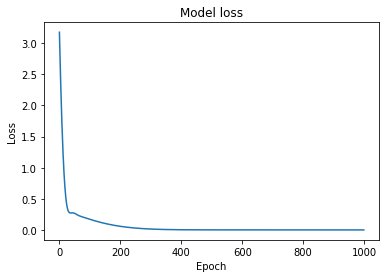

In [6]:
# Plot training  loss values
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

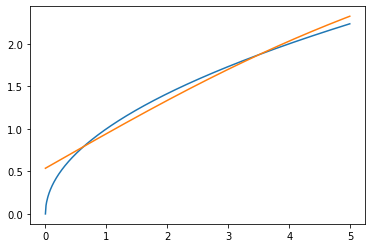

In [7]:
plt.plot(X,Y)
plt.plot(X,YP)
plt.show()

In [0]:
import numpy as np
X1 =np.expand_dims(np.arange(-5, 5, 0.01),1)
Y1 =1/(1+np.exp(-X1))
x = tf.placeholder(tf.float64, [None,1], name='x')
y = tf.placeholder(tf.float64, [None,1], name='y')

In [0]:
input_layer = tf.layers.dense(x, 100, activation= tf.nn.relu)
hidden_layer1 = tf.layers.dropout(input_layer,0.5)
hidden_layer2 = tf.layers.dropout(hidden_layer1,0.5)
output_layer = tf.layers.dense(hidden_layer2,1)
Loss =tf.losses.mean_squared_error(y , output_layer)
Optimizer = tf.train.AdamOptimizer(learning_rate= 0.005).minimize(Loss)
init = tf.global_variables_initializer()

In [10]:
total_parameters = 0
variable_parameters = 0
for variable in tf.trainable_variables():
    # shape is an array of tf.Dimension
    print(variable)
    shape = variable.get_shape()
    print(shape)
    #print(len(shape))
    variable_parameters = 1
    for dim in shape:
        #print(dim)
        variable_parameters *= dim.value
    print(variable_parameters)
    total_parameters += variable_parameters
print(total_parameters)

<tf.Variable 'dense/kernel:0' shape=(1, 100) dtype=float64_ref>
(1, 100)
100
<tf.Variable 'dense/bias:0' shape=(100,) dtype=float64_ref>
(100,)
100
<tf.Variable 'dense_1/kernel:0' shape=(100, 1) dtype=float64_ref>
(100, 1)
100
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float64_ref>
(1,)
1
<tf.Variable 'dense_2/kernel:0' shape=(1, 100) dtype=float64_ref>
(1, 100)
100
<tf.Variable 'dense_2/bias:0' shape=(100,) dtype=float64_ref>
(100,)
100
<tf.Variable 'dense_3/kernel:0' shape=(100, 1) dtype=float64_ref>
(100, 1)
100
<tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float64_ref>
(1,)
1
602


In [11]:
loss_list1=[]
sess.run(init)
for i in range(0,1000):
  fd ={x:X1, y:Y1}
  _, loss_val1 = sess.run([Optimizer, Loss], feed_dict=fd)
  loss_list1.append(loss_val1)
print ('loss last 50 = %s' % loss_list1[950:])

YP1 = sess.run(output_layer,feed_dict={x:X1})

loss last 50 = [1.6198113e-06, 1.6097905e-06, 1.6065687e-06, 1.6084556e-06, 1.6128437e-06, 1.6171355e-06, 1.619513e-06, 1.6190422e-06, 1.6156686e-06, 1.6099764e-06, 1.6028845e-06, 1.595346e-06, 1.5881583e-06, 1.5818493e-06, 1.5766846e-06, 1.5726906e-06, 1.5697268e-06, 1.5675814e-06, 1.5659872e-06, 1.5647269e-06, 1.5636364e-06, 1.5625969e-06, 1.5615443e-06, 1.5604573e-06, 1.5593488e-06, 1.5582638e-06, 1.5572622e-06, 1.5564337e-06, 1.5558873e-06, 1.5557521e-06, 1.5561626e-06, 1.5569041e-06, 1.5584775e-06, 1.5612284e-06, 1.5653555e-06, 1.5720586e-06, 1.5824642e-06, 1.5981913e-06, 1.6216705e-06, 1.656495e-06, 1.7082705e-06, 1.7857997e-06, 1.9026483e-06, 2.0802574e-06, 2.3525843e-06, 2.7742478e-06, 3.4329864e-06, 4.4717976e-06, 6.120889e-06, 8.760669e-06]


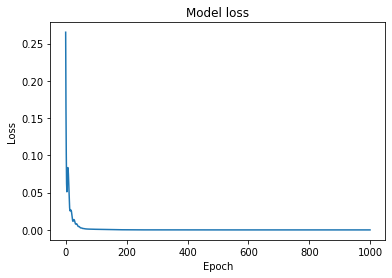

In [12]:
# Plot training  loss values
import matplotlib.pyplot as plt
plt.plot(loss_list1)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

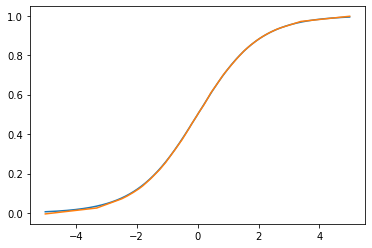

In [13]:
plt.plot(X1,Y1)
plt.plot(X1,YP1)
plt.show()

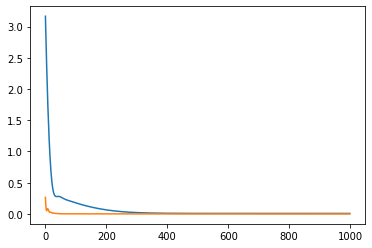

In [14]:
plt.plot(loss_list)
plt.plot(loss_list1);

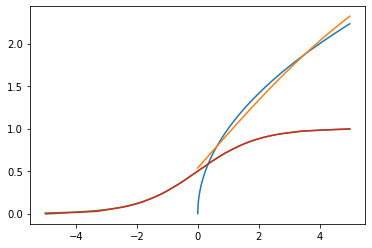

In [15]:
plt.plot(X,Y)
plt.plot(X,YP)
plt.plot(X1,Y1)
plt.plot(X1,YP1);

In [0]:
import numpy as np
X11 =np.expand_dims(np.arange(-5, 5, 0.01),1)
Y11 =1/(1+np.exp(-pow(X11,2)))
x1 = tf.placeholder(tf.float64, [None,1], name='x1')
y1 = tf.placeholder(tf.float64, [None,1], name='y1')

In [0]:
input_layer1 = tf.layers.dense(x1, 50, activation= tf.nn.relu)
hidden_layer11 = tf.layers.dropout(input_layer1,0.5)
hidden_layer21 = tf.layers.dropout(hidden_layer11,0.5)
hidden_layer31 = tf.layers.dropout(hidden_layer21,0.5)
output_layer1 = tf.layers.dense(hidden_layer31,1)
Loss1 =tf.losses.mean_squared_error(y1 ,output_layer1)
Optimizer1 = tf.train.AdamOptimizer(learning_rate= 0.005).minimize(Loss1)
init1 = tf.global_variables_initializer()

In [18]:
total_parameters = 0
variable_parameters = 0
for variable in tf.trainable_variables():
    # shape is an array of tf.Dimension
    print(variable)
    shape = variable.get_shape()
    print(shape)
    #print(len(shape))
    variable_parameters = 1
    for dim in shape:
        #print(dim)
        variable_parameters *= dim.value
    print(variable_parameters)
    total_parameters += variable_parameters
print(total_parameters)

<tf.Variable 'dense/kernel:0' shape=(1, 100) dtype=float64_ref>
(1, 100)
100
<tf.Variable 'dense/bias:0' shape=(100,) dtype=float64_ref>
(100,)
100
<tf.Variable 'dense_1/kernel:0' shape=(100, 1) dtype=float64_ref>
(100, 1)
100
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float64_ref>
(1,)
1
<tf.Variable 'dense_2/kernel:0' shape=(1, 100) dtype=float64_ref>
(1, 100)
100
<tf.Variable 'dense_2/bias:0' shape=(100,) dtype=float64_ref>
(100,)
100
<tf.Variable 'dense_3/kernel:0' shape=(100, 1) dtype=float64_ref>
(100, 1)
100
<tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float64_ref>
(1,)
1
<tf.Variable 'dense_4/kernel:0' shape=(1, 50) dtype=float64_ref>
(1, 50)
50
<tf.Variable 'dense_4/bias:0' shape=(50,) dtype=float64_ref>
(50,)
50
<tf.Variable 'dense_5/kernel:0' shape=(50, 1) dtype=float64_ref>
(50, 1)
50
<tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float64_ref>
(1,)
1
753


In [19]:
loss_list11=[]
sess.run(init1)
for i in range(0,1000):
  fd ={x1:X1, y1:Y1}
  _, loss_val11 = sess.run([Optimizer1, Loss1], feed_dict=fd)
  loss_list11.append(loss_val11)
print ('loss last 50 = %s' % loss_list11[950:])

YP11 = sess.run(output_layer1,feed_dict={x1:X11})

loss last 50 = [3.4768396e-05, 3.4664816e-05, 3.4561745e-05, 3.445919e-05, 3.435715e-05, 3.4255616e-05, 3.4154757e-05, 3.4054476e-05, 3.3954704e-05, 3.385543e-05, 3.375669e-05, 3.3658034e-05, 3.355956e-05, 3.3461372e-05, 3.3363453e-05, 3.3265926e-05, 3.316881e-05, 3.3071876e-05, 3.2975324e-05, 3.2878565e-05, 3.2782e-05, 3.268586e-05, 3.259008e-05, 3.2494856e-05, 3.240005e-05, 3.230569e-05, 3.2211763e-05, 3.2117718e-05, 3.2023974e-05, 3.193063e-05, 3.1837677e-05, 3.1745123e-05, 3.1652995e-05, 3.1561285e-05, 3.147001e-05, 3.1379113e-05, 3.1288633e-05, 3.1198608e-05, 3.1108997e-05, 3.101978e-05, 3.0931005e-05, 3.0842817e-05, 3.0755e-05, 3.0667074e-05, 3.057958e-05, 3.0492503e-05, 3.0405681e-05, 3.031906e-05, 3.0232779e-05, 3.01469e-05]


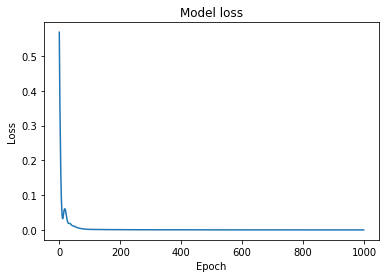

In [20]:
# Plot training  loss values
import matplotlib.pyplot as plt
plt.plot(loss_list11)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

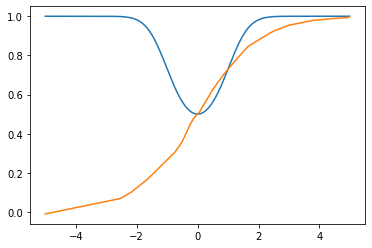

In [25]:
plt.plot(X11,Y11)
plt.plot(X11,YP11)
plt.show()

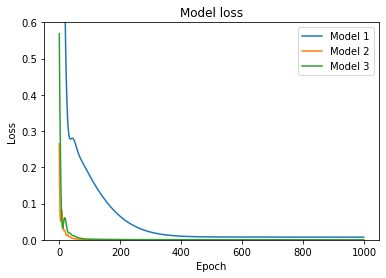

In [22]:
plt.plot(loss_list,label = 'Model 1')
plt.plot(loss_list1,label = 'Model 2')
plt.plot(loss_list11,label = 'Model 3')
plt.ylim([0,0.6])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend();

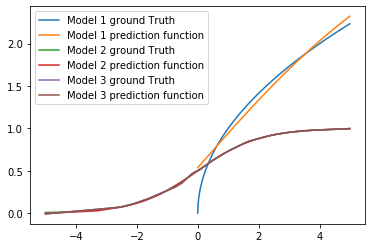

In [26]:
plt.plot(X,Y,label = 'Model 1 ground Truth')
plt.plot(X,YP,label = 'Model 1 prediction function')
plt.plot(X1,Y1,label = 'Model 2 ground Truth')
plt.plot(X1,YP1,label = 'Model 2 prediction function')
plt.plot(X11,YP11,label = 'Model 3 ground Truth')
plt.plot(X11,YP11,label = 'Model 3 prediction function')
plt.legend();